In [1]:
PADDING = 2
HEIGHT_OF_KEY = 5
WIDTH_OF_SCREEN = 400
KEYSLIST = ["qwertyuiop", "asdfghjkl", "zxcvbnm"]

In [2]:
WIDTH_OF_KEY =  (WIDTH_OF_SCREEN - (2 * PADDING)) / len(KEYSLIST[0])


In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [4]:
pointsOfKeys = []
keysPointsDict = {}



for rowIndex, keys in enumerate(KEYSLIST):
    heightOffset = (rowIndex * (HEIGHT_OF_KEY + (2 * PADDING))) + (HEIGHT_OF_KEY / 2)
    initalWidthOffset = (WIDTH_OF_SCREEN - (len( keys) * WIDTH_OF_KEY)) / 2

    for index, key in enumerate(keys):
        widthOffset = initalWidthOffset + (index * WIDTH_OF_KEY)
        point = Point(widthOffset,heightOffset)

        pointsOfKeys.append((key,point))
        keysPointsDict[key] = point

In [5]:
pointsOfKeys

[('q', <__main__.Point at 0x16fa0d21490>),
 ('w', <__main__.Point at 0x16fa0d214c0>),
 ('e', <__main__.Point at 0x16fa0d215e0>),
 ('r', <__main__.Point at 0x16fa0d21550>),
 ('t', <__main__.Point at 0x16fa0d216a0>),
 ('y', <__main__.Point at 0x16fa0d21700>),
 ('u', <__main__.Point at 0x16fa0d21760>),
 ('i', <__main__.Point at 0x16fa0d217f0>),
 ('o', <__main__.Point at 0x16fa0d21850>),
 ('p', <__main__.Point at 0x16fa0d218b0>),
 ('a', <__main__.Point at 0x16fa0d21910>),
 ('s', <__main__.Point at 0x16fa0d21970>),
 ('d', <__main__.Point at 0x16fa0d21790>),
 ('f', <__main__.Point at 0x16fa0d21a00>),
 ('g', <__main__.Point at 0x16fa0d21a60>),
 ('h', <__main__.Point at 0x16fa0d21ac0>),
 ('j', <__main__.Point at 0x16fa0d21b20>),
 ('k', <__main__.Point at 0x16fa0d21bb0>),
 ('l', <__main__.Point at 0x16fa0d21c10>),
 ('z', <__main__.Point at 0x16fa0d21ca0>),
 ('x', <__main__.Point at 0x16fa0d21d00>),
 ('c', <__main__.Point at 0x16fa0d21d60>),
 ('v', <__main__.Point at 0x16fa0d21160>),
 ('b', <__m

In [6]:
print(pointsOfKeys[0][1].x)
print(pointsOfKeys[0][1].y)

2.0
2.5


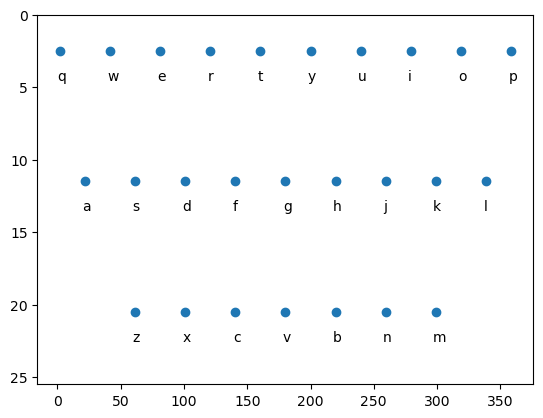

In [7]:
import matplotlib.pyplot as plt



x = [p[1].x for p in pointsOfKeys]
y = [p[1].y for p in pointsOfKeys]
key = [p[0] for p in pointsOfKeys]

fig,ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(key):
    ax.annotate(txt,(x[i] - 2,y[i] + 2))

ax.set_ylim((0,max(y) + 5))
axs = plt.gca()
axs.invert_yaxis() #Invert the y axis 

In [8]:
WORD = "SEA"
wordPointsList = []



for char in WORD:
    char = char.lower()
    wordPointsList.append(keysPointsDict.get(char))
    print(keysPointsDict.get(char).x,keysPointsDict.get(char).y)


61.399999999999984 11.5
81.2 2.5
21.799999999999983 11.5


In [9]:
x_coords  = [i.x for i in wordPointsList]
y_coords  = [i.y for i in wordPointsList]

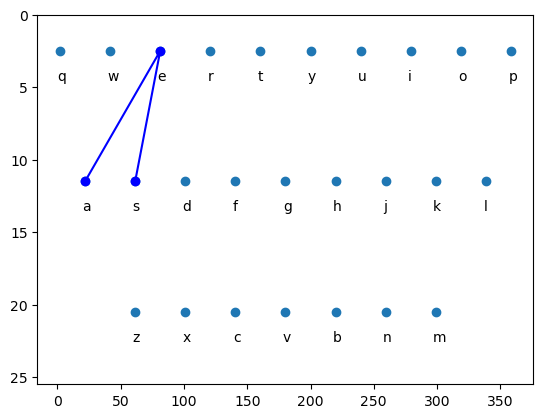

In [10]:


fig, ax = plt.subplots()
ax.scatter(x,y)


for i, txt in enumerate(key):
    ax.annotate(txt,(x[i] - 2,y[i] + 2))

ax.set_ylim((0,max(y) + 5))

axs = plt.gca()
axs.invert_yaxis()
ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')


In [11]:
import numpy as np


def add_noise(p :Point,NOISE = 0.5 ):
    return Point(np.random.normal(p.x, NOISE),np.random.normal(p.y, NOISE))

point = Point(1,2)
random_near_point = add_noise(point)

print(random_near_point.x,random_near_point.y)

0.5141175690236652 2.5401018109292774


In [12]:
def drawKeyBoard():
    x = [p[1].x for p in pointsOfKeys]
    y = [p[1].y for p in pointsOfKeys]
    key = [p[0] for p in pointsOfKeys]

    fig,ax = plt.subplots()
    ax.scatter(x,y)

    for i, txt in enumerate(key):
        ax.annotate(txt,(x[i] - 2,y[i] + 2))

    ax.set_ylim((0,max(y) + 5))
    axs = plt.gca()
    axs.invert_yaxis() 
    return ax

In [13]:
def drawCrtPointsForSentence( sentence : str):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            wordPointsList.append(keysPointsDict.get(char))

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]

    ax.plot(x_coords,y_coords)



<Axes: >

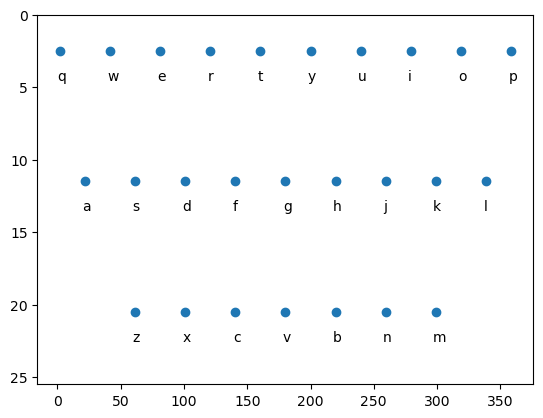

In [14]:
drawKeyBoard()

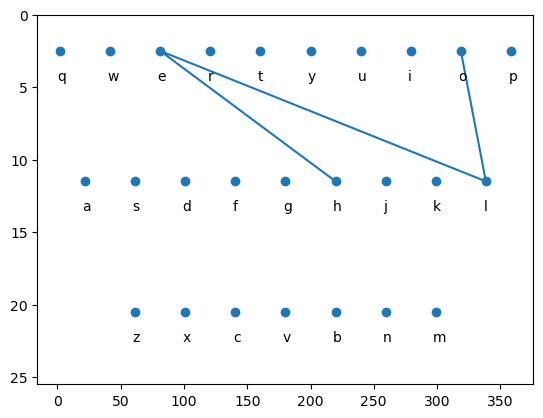

In [15]:
drawCrtPointsForSentence("HELLO")

In [16]:
def drawPointsWithNoiseForSentence( sentence : str,NOISE = 0.5):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            noised_point = add_noise(keysPointsDict.get(char),NOISE = NOISE)
            wordPointsList.append(noised_point)

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]


    ax.plot(x_coords,y_coords)



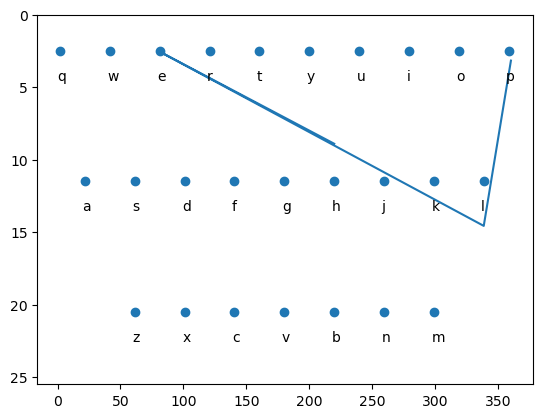

In [17]:
drawPointsWithNoiseForSentence("HELP", NOISE= 2)

## Geting Actual keys from curve

In [18]:
MAX_POINTS = 12


for rowIndex, keys in enumerate(KEYSLIST):
    heightOffset = (rowIndex * (HEIGHT_OF_KEY + (2 * PADDING)))
    initalWidthOffset = (WIDTH_OF_SCREEN - (len(keys) * WIDTH_OF_KEY)) / 2

    for index, key in enumerate(keys):
        widthOffset = initalWidthOffset + (index * WIDTH_OF_KEY)
        print( key ,  int(widthOffset) ,",", heightOffset )





q 2 , 0
w 41 , 0
e 81 , 0
r 120 , 0
t 160 , 0
y 200 , 0
u 239 , 0
i 279 , 0
o 318 , 0
p 358 , 0
a 21 , 9
s 61 , 9
d 100 , 9
f 140 , 9
g 180 , 9
h 219 , 9
j 259 , 9
k 299 , 9
l 338 , 9
z 61 , 18
x 101 , 18
c 140 , 18
v 180 , 18
b 219 , 18
n 259 , 18
m 299 , 18


In [19]:
test = Point(220, 11.5)

In [20]:
test.x / WIDTH_OF_KEY

5.555555555555555

In [21]:
test.y // (HEIGHT_OF_KEY +  (2* PADDING)) 

1.0

In [22]:
def getNearestKeyFromPoint(p : Point):
    rowIndex = int( p.y // (HEIGHT_OF_KEY +  (2* PADDING)) )
    keys = KEYSLIST[rowIndex]

    initalWidthOffset =PADDING if rowIndex == 0 else (WIDTH_OF_SCREEN - PADDING - (len(keys) * WIDTH_OF_KEY)) / 2
    
    x = int((p.x - initalWidthOffset) // WIDTH_OF_KEY)
    key = keys[x]

    return key


In [23]:
getNearestKeyFromPoint(Point(219.79999,10))

'h'

In [24]:
def equalPoints(p1 : Point, p2  : Point, num_points = MAX_POINTS):
    x_coords = np.linspace(p1.x, p2.x, num=num_points)
    y_coords = np.linspace(p1.y, p2.y, num=num_points)

    return [ Point(x=x_coords[index],y=y_coords[index])  for index in range(num_points)  ]


def addKeyAndReturnText(text,key):
    if (len(text) == 0) or text[-1] != key:
        text += key
    return text

def addAllKeysNearestToLine(text: str, p1 : Point, p2  : Point, num_points = MAX_POINTS):

    text =  addKeyAndReturnText(text,getNearestKeyFromPoint(p1))
    
    points = equalPoints(p1, p2, num_points)
    for point in points:
        key = getNearestKeyFromPoint(point)
        text = addKeyAndReturnText(text, key)

    text = addKeyAndReturnText(text,getNearestKeyFromPoint(p2))

    return text




In [25]:
def getTextFromCoordinatesList(coordPoints):
    text  = ""

    if (len(coordPoints) == 1):
        text = getNearestKeyFromPoint(coordPoints[1])

    for i in range(len( coordPoints) -1):
        p1 = coordPoints[i]
        p2 = coordPoints[ i + 1]

        text = addAllKeysNearestToLine(text, p1, p2)
    
    return text

In [26]:
def drawCrtPointsForSentence( sentence : str):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            wordPointsList.append(keysPointsDict.get(char))

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]

    ax.plot(x_coords,y_coords)

    text = getTextFromCoordinatesList(wordPointsList)
    return text



'hgtrertyujklko'

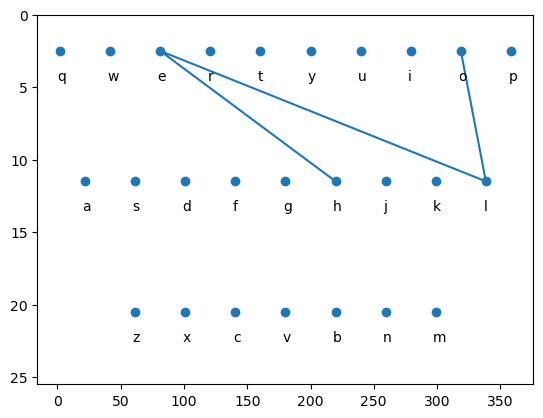

In [27]:
drawCrtPointsForSentence("HELLO")

In [28]:
def drawPointsWithNoiseForSentence( sentence : str,NOISE = 0.5):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            noised_point = add_noise(keysPointsDict.get(char),NOISE = NOISE)
            wordPointsList.append(noised_point)

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]


    ax.plot(x_coords,y_coords)
    text = getTextFromCoordinatesList(wordPointsList)
    return text


'hgtrertyujklkoi'

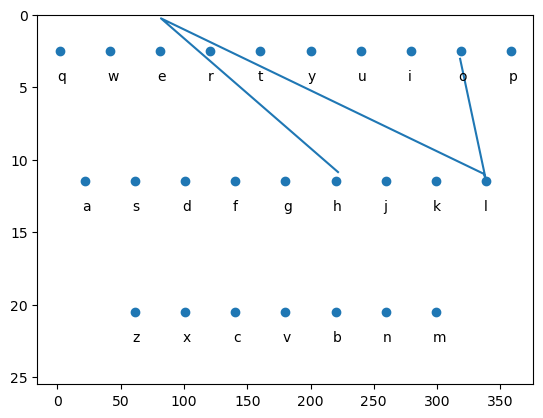

In [35]:

drawPointsWithNoiseForSentence("HELLO" , NOISE= 1.5)